In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#импортируем все необходимые для работы библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import factorial
import math

import warnings
warnings.filterwarnings('ignore')

## Изучение данных из файла

In [3]:
pd.set_option('display.max_columns', 100)

### Подготовка к работе

In [4]:
#прочитаем данные из файлов

data_calls = pd.read_csv('/content/drive/My Drive/Collab file/calls.csv')
data_internet = pd.read_csv('/content/drive/My Drive/Collab file/internet.csv',  index_col=0)
data_messages = pd.read_csv('/content/drive/My Drive/Collab file/messages.csv') 
data_tariffs = pd.read_csv('/content/drive/My Drive/Collab file/tariffs.csv') 
data_users = pd.read_csv('/content/drive/My Drive/Collab file/users.csv') 

In [5]:
def open_data(data):
  display(data.head())
  print('------------------------')
  print('Общая информация')
  data.info()
  print('------------------------')
  print('Описание данных')
  display(data.describe())
  print('------------------------')
  print('Количество дубликатов')
  print(data.duplicated().sum())
  print('------------------------')
  print('Количество пропусков')
  display(data.isna().sum())

### Знакомство с данными о звонках

In [6]:
open_data(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
------------------------
Описание данных


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id           0
call_date    0
duration     0
user_id      0
dtype: int64

**Описание данных**

- ***id*** — уникальный номер звонка
- ***call_date*** — дата звонка
- ***duration*** — длительность звонка в минутах
- ***user_id*** — идентификатор пользователя, сделавшего звонок

**Комментарий:**

- Наименование столбцов без ошибок, пропущенных значений нет. 
- Нулевая продолжительность звонка - пропущенный вызов. 
- Необходимо привести тип данных столбца ***call_date*** к datetime и столбец ***id*** к int (однако сначала необходимо понять, нужен ли нам вообще будет данный столбец). 
- Длительность звонков небходимо округлить в большую сторону, таким образом и нулевые звонки у нас получатся по 1 минуте.

### Знакомство с данными об интернет-сессиях

In [7]:
open_data(data_internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
------------------------
Описание данных


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

**Описание данных**

- ***id*** — уникальный номер сессии
- ***mb_used*** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- ***session_date*** — дата интернет-сессии
- ***user_id*** — идентификатор пользователя

**Комментарий:**

- В данной таблице данных меньше, чем в таблице о звонках. 
- Заголовки нормальные, пропусков внутри таблицы нет. 
- Столбец ***session_date*** нужно будет привести к типу datetime. 
- Также я хочу округлить значения в столбце ***mb_used*** до целых и привести к типу данных int.

### Знакомство с данными о сообщениях

In [8]:
open_data(data_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
------------------------
Описание данных


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


id              0
message_date    0
user_id         0
dtype: int64

**Описание данных**

- ***id*** — уникальный номер сообщения
- ***message_date*** — дата сообщения
- ***user_id*** — идентификатор пользователя, отправившего сообщение

**Комментарий:**

- Таблица также выглядит нормально, значений меньше, чем в предыдущих двух таблицах, пропусков нет. 
- Столбец ***message_date*** нужно будет привести к типу datetime.

### Знакомство с данными о тарифах

In [9]:
open_data(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
------------------------
Описание данных


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

**Описание данных**

- ***tariff_name*** — название тарифа
- ***rub_monthly_fee*** — ежемесячная абонентская плата в рублях
- ***minutes_included*** — количество минут разговора в месяц, включённых в абонентскую плату
- ***messages_included*** — количество сообщений в месяц, включённых в абонентскую плату
- ***mb_per_month_included*** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- ***rub_per_minute*** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- ***rub_per_message*** — стоимость отправки сообщения сверх тарифного пакета
- ***rub_per_gb*** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Комментарий:**

Данные выглядят нормально, изменений никаких не требуется.

### Знакомство с данными о пользователях

In [10]:
open_data(data_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
------------------------
Описание данных


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


------------------------
Количество дубликатов
0
------------------------
Количество пропусков


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

**Описание данных**

- ***user_id*** — уникальный идентификатор пользователя
- ***first_name*** — имя пользователя
- ***last_name*** — фамилия пользователя
- ***age*** — возраст пользователя (годы)
- ***reg_date*** — дата подключения тарифа (день, месяц, год)
- ***churn_date*** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- ***city*** — город проживания пользователя
- ***tarif*** — название тарифного плана

**Комментарий:**

- Мы наблюдаем много пропусков в столбце **churn_data** заполнять мы их не будем. 
- Также необходимо будет привести тип данных в столбце ***reg_date*** и **churn_date** к типу datetime.

## Работа с типом данных и исправление ошибок

### Таблица со звонками

In [11]:
#исправим тип данных

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [12]:
#округлим длительность звонков до целого

data_calls['duration_round'] = np.ceil(data_calls['duration'])
data_calls['duration_round'] = data_calls['duration_round'].astype('int')
data_calls.head(10)

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
5,1000_5,2018-11-02,0.00,1000,0
6,1000_6,2018-10-18,0.00,1000,0
7,1000_7,2018-08-22,18.31,1000,19
8,1000_8,2018-09-15,18.44,1000,19
9,1000_9,2018-08-15,0.00,1000,0


In [13]:
#звонки с нулевой длительностью заменим на 1 минуту

data_calls.loc[data_calls['duration_round'] == 0, 'duration_round'] = 1
data_calls.head(10)

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,1
1,1000_1,2018-08-17,0.00,1000,1
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
5,1000_5,2018-11-02,0.00,1000,1
6,1000_6,2018-10-18,0.00,1000,1
7,1000_7,2018-08-22,18.31,1000,19
8,1000_8,2018-09-15,18.44,1000,19
9,1000_9,2018-08-15,0.00,1000,1


### Таблица с интернет-сессиями

In [14]:
#изменим тип данных

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [15]:
#округлим значения в столбце mb_used до целых в большую сторону

data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)
data_internet['mb_used'] = data_internet['mb_used'].astype('int')
data_internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [16]:
data_internet[data_internet['mb_used'] == 0].count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

**Комментарий:**
<br>Нулей много, но отдельные интернет-сессии до 1 округлять не будем, так как по-отдельности они не учитываются.

### Таблица с сообщениями

In [17]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Таблица с пользователями

In [18]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Подготовительные рассчёты

**Задание:**\
Посчитайте для каждого пользователя:
* 		количество сделанных звонков и израсходованных минут разговора по месяцам;
* 		количество отправленных сообщений по месяцам;
* 		объем израсходованного интернет-трафика по месяцам;
* 		помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Звонки и минуты разговора по месяцам

In [19]:
data_calls['calls_month'] = data_calls['call_date'].astype('datetime64[M]')
data_calls.head(5)

,id,call_date,duration,user_id,duration_round,calls_month
0,1000_0,2018-07-25,0.00,1000,1,2018-07-01
1,1000_1,2018-08-17,0.00,1000,1,2018-08-01
2,1000_2,2018-06-11,2.85,1000,3,2018-06-01
3,1000_3,2018-09-21,13.80,1000,14,2018-09-01
4,1000_4,2018-12-15,5.18,1000,6,2018-12-01


In [20]:
#посмотрим на количество звонков по месяцам по всем пользователям

count_calls_m = data_calls['calls_month'].value_counts()
count_calls_m

2018-12-01    33987
2018-11-01    29501
2018-10-01    27146
2018-09-01    24061
2018-08-01    21488
2018-07-01    18298
2018-06-01    14716
2018-05-01    12647
2018-04-01     9272
2018-03-01     6687
2018-02-01     3328
2018-01-01     1476
Name: calls_month, dtype: int64

**Комментарий:**
<br>Интересно, что в январе звонков меньше всего, а в декабре больше.

In [21]:
#посмотрим на минуты разговора по месяцам

duration_calls_m = data_calls.groupby('calls_month')['duration_round'].sum()
duration_calls_m

calls_month
2018-01-01     11096
2018-02-01     25078
2018-03-01     49455
2018-04-01     68078
2018-05-01     91341
2018-06-01    108063
2018-07-01    135264
2018-08-01    157929
2018-09-01    178090
2018-10-01    199317
2018-11-01    215926
2018-12-01    250277
Name: duration_round, dtype: int64

### Сообщения по месяцам

In [22]:
data_messages['message_month'] = data_messages['message_date'].astype('datetime64[M]')
data_messages.head(5)

,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [23]:
#посмотрим на количество сообщений по месяцам

count_messages_m = data_messages['message_month'].value_counts()
count_messages_m

2018-12-01    20555
2018-11-01    18244
2018-10-01    17114
2018-09-01    14759
2018-08-01    13088
2018-07-01    11320
2018-06-01     8983
2018-05-01     7298
2018-04-01     5179
2018-03-01     3648
2018-02-01     1924
2018-01-01      924
Name: message_month, dtype: int64

### Объём интернет-трафика по месяцам

In [24]:
data_internet['session_month'] = data_internet['session_date'].astype('datetime64[M]')
data_internet.head(5)

,id,mb_used,session_date,user_id,session_month
0,1000_0,113,2018-11-25,1000,2018-11-01
1,1000_1,1053,2018-09-07,1000,2018-09-01
2,1000_2,1198,2018-06-25,1000,2018-06-01
3,1000_3,551,2018-08-22,1000,2018-08-01
4,1000_4,303,2018-09-24,1000,2018-09-01


In [25]:
#посмотрим на объем интернет-трафика по месяцам

count_session_m = data_internet.groupby('session_month')['mb_used'].sum()
count_session_m

session_month
2018-01-01     408213
2018-02-01     956348
2018-03-01    1813960
2018-04-01    2436111
2018-05-01    3529893
2018-06-01    4184770
2018-07-01    5035299
2018-08-01    6005126
2018-09-01    6454931
2018-10-01    7400754
2018-11-01    7999852
2018-12-01    9144202
Name: mb_used, dtype: int64

### Помесячная выручка на каждого пользователя

Чтобы посчитать помесячную выручку нам необходимо сделать новый датафрейм, который будет включать в себя данные о пользователе, его тарифе, количестве звонков/сообщений/интернет-трафике в месяц и тарифные ставки. Объединим все таблицы (кроме таблицы с тарифами) по столбцу user_id. Потом добавим к каждому его тарифный план.

In [26]:
#объединим таблицы по звонкам и пользователям

table1 = data_calls.merge(data_users, on='user_id', how='left')
table1.head(10)

,id,call_date,duration,user_id,duration_round,calls_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0.00,1000,1,2018-07-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0.00,1000,1,2018-08-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-06-11,2.85,1000,3,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-09-21,13.80,1000,14,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-15,5.18,1000,6,2018-12-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000_5,2018-11-02,0.00,1000,1,2018-11-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000_6,2018-10-18,0.00,1000,1,2018-10-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000_7,2018-08-22,18.31,1000,19,2018-08-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1000_8,2018-09-15,18.44,1000,19,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
9,1000_9,2018-08-15,0.00,1000,1,2018-08-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [27]:
#сгруппируем таблицу, которая будет показывать общую продолжительность звонков по меясцам по каждому пользователю

table1_group = table1.pivot_table(index=['user_id', 'tariff', 'calls_month'], values=['id','duration_round'], aggfunc={'id': 'count', 'duration_round': 'sum'})
table1_group.columns = ['duration', 'calls']
table1_group.head(10)

duration  calls
user_id tariff calls_month                 
1000    ultra  2018-05-01        164     22
               2018-06-01        187     43
               2018-07-01        346     47
               2018-08-01        418     52
               2018-09-01        478     58
               2018-10-01        363     57
               2018-11-01        344     43
               2018-12-01        341     46
1001    smart  2018-11-01        444     59
               2018-12-01        430     63

In [28]:
#объединим таблицы по интернет-сессиям и пользователям

table2 = data_internet.merge(data_users, on='user_id', how='left')
table2.head(10)

,id,mb_used,session_date,user_id,session_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,113,2018-11-25,1000,2018-11-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,1053,2018-09-07,1000,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,1198,2018-06-25,1000,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,551,2018-08-22,1000,2018-08-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,303,2018-09-24,1000,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000_5,400,2018-10-02,1000,2018-10-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000_6,541,2018-09-07,1000,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000_7,416,2018-07-11,1000,2018-07-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1000_8,506,2018-10-08,1000,2018-10-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
9,1000_9,346,2018-09-03,1000,2018-09-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [29]:
#сгруппируем данные по количеству потраченных мегабайтов по-месячно по каждому пользователю

table2_group = table2.pivot_table(index=['user_id', 'tariff', 'session_month'], values='mb_used', aggfunc='sum')
table2_group.head(10)

mb_used
user_id tariff session_month         
1000    ultra  2018-05-01        2256
               2018-06-01       23257
               2018-07-01       14016
               2018-08-01       14070
               2018-09-01       14581
               2018-10-01       14717
               2018-11-01       14768
               2018-12-01        9827
1001    smart  2018-11-01       18452
               2018-12-01       14053

In [30]:
#объединим таблицы с сообщениями и пользователями

table3 = data_messages.merge(data_users, on='user_id', how='left')
table3.head(10)

,id,message_date,user_id,message_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-06-27,1000,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-10-08,1000,2018-10-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-08-04,1000,2018-08-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-06-16,1000,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-05,1000,2018-12-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000_5,2018-06-20,1000,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000_6,2018-11-19,1000,2018-11-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000_7,2018-10-29,1000,2018-10-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1000_8,2018-06-25,1000,2018-06-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
9,1000_9,2018-12-18,1000,2018-12-01,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [31]:
#сгруппируем данные по количеству сообщений по-месячно по каждому пользователю

table3_group = table3.pivot_table(index=['user_id', 'tariff', 'message_month'], values='id', aggfunc='count')
table3_group.columns = ['messages']
table3_group.head(10)

messages
user_id tariff message_month          
1000    ultra  2018-05-01           22
               2018-06-01           60
               2018-07-01           75
               2018-08-01           81
               2018-09-01           57
               2018-10-01           73
               2018-11-01           58
               2018-12-01           70
1002    smart  2018-06-01            4
               2018-07-01           11

In [32]:
#объединим наши таблицы в одну для наглядности

tables = [table2_group, table3_group]
grouped_data = table1_group.join(tables, how='outer')
grouped_data.head(20)

duration  calls  mb_used  messages
user_id tariff                                               
1000    ultra  2018-05-01     164.0   22.0   2256.0      22.0
               2018-06-01     187.0   43.0  23257.0      60.0
               2018-07-01     346.0   47.0  14016.0      75.0
               2018-08-01     418.0   52.0  14070.0      81.0
               2018-09-01     478.0   58.0  14581.0      57.0
               2018-10-01     363.0   57.0  14717.0      73.0
               2018-11-01     344.0   43.0  14768.0      58.0
               2018-12-01     341.0   46.0   9827.0      70.0
1001    smart  2018-11-01     444.0   59.0  18452.0       NaN
               2018-12-01     430.0   63.0  14053.0       NaN
1002    smart  2018-06-01     118.0   15.0  10871.0       4.0
               2018-07-01     219.0   26.0  17601.0      11.0
               2018-08-01     294.0   42.0  20347.0      13.0
               2018-09-01     217.0   36.0  16712.0       4.0
               2018-10-01     221.0   33.0  13905.0      10.0
               2018-11-01     250.0   32.0  18610.0      16.0
               2018-12-01     242.0   33.0  18137.0      12.0
1003    ultra  2018-08-01     392.0   55.0   8571.0      37.0
               2018-09-01     990.0  134.0  12479.0      91.0
               2018-10-01     866.0  108.0  14779.0      83.0

In [33]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'ultra', Timestamp('2018-05-01 00:00:00')) to (1499, 'smart', Timestamp('2018-12-01 00:00:00'))
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  3174 non-null   float64
 1   calls     3174 non-null   float64
 2   mb_used   3203 non-null   float64
 3   messages  2717 non-null   float64
dtypes: float64(4)
memory usage: 133.7+ KB


In [34]:
#уберем индексы для удобства

grouped_data.reset_index(inplace=True)
grouped_data.head(10)

,user_id,tariff,level_2,duration,calls,mb_used,messages
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0
5,1000,ultra,2018-10-01,363.0,57.0,14717.0,73.0
6,1000,ultra,2018-11-01,344.0,43.0,14768.0,58.0
7,1000,ultra,2018-12-01,341.0,46.0,9827.0,70.0
8,1001,smart,2018-11-01,444.0,59.0,18452.0,NaN
9,1001,smart,2018-12-01,430.0,63.0,14053.0,NaN


In [35]:
#переименуем колонки, чтобы они по названиям совпадали с колонками из изначальных таблиц

grouped_data.columns = ['user_id', 'tariff_name', 'month', 'calls', 'duration', 'mb_used', 'messages']
grouped_data.head(10)

,user_id,tariff_name,month,calls,duration,mb_used,messages
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0
5,1000,ultra,2018-10-01,363.0,57.0,14717.0,73.0
6,1000,ultra,2018-11-01,344.0,43.0,14768.0,58.0
7,1000,ultra,2018-12-01,341.0,46.0,9827.0,70.0
8,1001,smart,2018-11-01,444.0,59.0,18452.0,NaN
9,1001,smart,2018-12-01,430.0,63.0,14053.0,NaN


In [36]:
#сделаем дополнительную таблицу для рассчета выручки
#для этого присоединяем таблицу с данными по тарифам

table_for_rev = grouped_data.merge(data_tariffs, on='tariff_name', how='left')

In [37]:
#чтобы избежать пропусков в конечных данных, избавляемся от них

table_for_rev['messages'] = table_for_rev['messages'].fillna(0)
table_for_rev['mb_used'] = table_for_rev['mb_used'].fillna(0)
table_for_rev['duration'] = table_for_rev['duration'].fillna(0)

In [38]:
table_for_rev.head(15)

,user_id,tariff_name,month,calls,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1
5,1000,ultra,2018-10-01,363.0,57.0,14717.0,73.0,1000,30720,3000,1950,150,1,1
6,1000,ultra,2018-11-01,344.0,43.0,14768.0,58.0,1000,30720,3000,1950,150,1,1
7,1000,ultra,2018-12-01,341.0,46.0,9827.0,70.0,1000,30720,3000,1950,150,1,1
8,1001,smart,2018-11-01,444.0,59.0,18452.0,0.0,50,15360,500,550,200,3,3
9,1001,smart,2018-12-01,430.0,63.0,14053.0,0.0,50,15360,500,550,200,3,3


In [39]:
#делаем рассчет выручки для звонков

table_for_rev['minutes_over_tariff'] = table_for_rev['duration'] - table_for_rev['minutes_included']
table_for_rev['call_add_fee'] = table_for_rev['minutes_over_tariff'] * table_for_rev['rub_per_minute']
table_for_rev['call_add_fee'] = table_for_rev['call_add_fee'].apply(lambda x: 0 if x < 0 else x)
table_for_rev['total_call_m'] = table_for_rev['rub_monthly_fee'] + table_for_rev['call_add_fee']
table_for_rev.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_tariff,call_add_fee,total_call_m
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,-2978.0,0,1950
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,-2957.0,0,1950
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,-2953.0,0,1950
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,-2948.0,0,1950
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,-2942.0,0,1950


In [40]:
#делаем рассчет выручки для сообщений

table_for_rev['messages_over_tariff'] = table_for_rev['messages'] - table_for_rev['messages_included']
table_for_rev['message_add_fee'] = np.ceil(table_for_rev['messages_over_tariff']) * table_for_rev['rub_per_message']
table_for_rev['message_add_fee'] = table_for_rev['message_add_fee'].apply(lambda x: 0 if x < 0 else x)
table_for_rev['total_message_m'] = table_for_rev['rub_monthly_fee'] + table_for_rev['message_add_fee']
table_for_rev.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_tariff,call_add_fee,total_call_m,messages_over_tariff,message_add_fee,total_message_m
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,-2978.0,0,1950,-978.0,0.0,1950.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,-2957.0,0,1950,-940.0,0.0,1950.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,-2953.0,0,1950,-925.0,0.0,1950.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,-2948.0,0,1950,-919.0,0.0,1950.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,-2942.0,0,1950,-943.0,0.0,1950.0


In [41]:
#делаем рассчет выручки для интернета

table_for_rev['internet_over_tariff'] = table_for_rev['mb_used'] - table_for_rev['mb_per_month_included']
table_for_rev['internet_add_fee'] = np.ceil(table_for_rev['internet_over_tariff'] / 1024) * table_for_rev['rub_per_gb']
table_for_rev['internet_add_fee'] = table_for_rev['internet_add_fee'].apply(lambda x: 0 if x < 0 else x)
table_for_rev['total_internet_m'] = table_for_rev['rub_monthly_fee'] + table_for_rev['internet_add_fee']
table_for_rev.head(25)


,user_id,tariff_name,month,calls,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_tariff,call_add_fee,total_call_m,messages_over_tariff,message_add_fee,total_message_m,internet_over_tariff,internet_add_fee,total_internet_m
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,-2978.0,0,1950,-978.0,0.0,1950.0,-28464.0,0.0,1950.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,-2957.0,0,1950,-940.0,0.0,1950.0,-7463.0,0.0,1950.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,-2953.0,0,1950,-925.0,0.0,1950.0,-16704.0,0.0,1950.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,-2948.0,0,1950,-919.0,0.0,1950.0,-16650.0,0.0,1950.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,-2942.0,0,1950,-943.0,0.0,1950.0,-16139.0,0.0,1950.0
5,1000,ultra,2018-10-01,363.0,57.0,14717.0,73.0,1000,30720,3000,1950,150,1,1,-2943.0,0,1950,-927.0,0.0,1950.0,-16003.0,0.0,1950.0
6,1000,ultra,2018-11-01,344.0,43.0,14768.0,58.0,1000,30720,3000,1950,150,1,1,-2957.0,0,1950,-942.0,0.0,1950.0,-15952.0,0.0,1950.0
7,1000,ultra,2018-12-01,341.0,46.0,9827.0,70.0,1000,30720,3000,1950,150,1,1,-2954.0,0,1950,-930.0,0.0,1950.0,-20893.0,0.0,1950.0
8,1001,smart,2018-11-01,444.0,59.0,18452.0,0.0,50,15360,500,550,200,3,3,-441.0,0,550,-50.0,0.0,550.0,3092.0,800.0,1350.0
9,1001,smart,2018-12-01,430.0,63.0,14053.0,0.0,50,15360,500,550,200,3,3,-437.0,0,550,-50.0,0.0,550.0,-1307.0,0.0,550.0


In [42]:
#собираем всю выручку в один столбец

table_for_rev['total_revenue'] = table_for_rev['call_add_fee'] + table_for_rev['message_add_fee'] + table_for_rev['internet_add_fee'] + table_for_rev['rub_monthly_fee'] 
table_for_rev.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_tariff,call_add_fee,total_call_m,messages_over_tariff,message_add_fee,total_message_m,internet_over_tariff,internet_add_fee,total_internet_m,total_revenue
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1000,30720,3000,1950,150,1,1,-2978.0,0,1950,-978.0,0.0,1950.0,-28464.0,0.0,1950.0,1950.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1000,30720,3000,1950,150,1,1,-2957.0,0,1950,-940.0,0.0,1950.0,-7463.0,0.0,1950.0,1950.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1000,30720,3000,1950,150,1,1,-2953.0,0,1950,-925.0,0.0,1950.0,-16704.0,0.0,1950.0,1950.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1000,30720,3000,1950,150,1,1,-2948.0,0,1950,-919.0,0.0,1950.0,-16650.0,0.0,1950.0,1950.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1000,30720,3000,1950,150,1,1,-2942.0,0,1950,-943.0,0.0,1950.0,-16139.0,0.0,1950.0,1950.0


In [43]:
#делаем срез только по нужным нам данным

pivot_data_final = table_for_rev.pivot_table(index=['user_id', 'tariff_name', 'month'], values=['calls', 'duration', 'mb_used', 'messages', 'total_revenue'], aggfunc={'calls': 'sum', 'duration': 'sum', 'mb_used': 'sum', 'messages': 'sum', 'total_revenue': 'sum'})

In [44]:
pivot_data_final.reset_index(inplace=True)
pivot_data_final.head(10)

,user_id,tariff_name,month,calls,duration,mb_used,messages,total_revenue
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1950.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1950.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1950.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1950.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1950.0
5,1000,ultra,2018-10-01,363.0,57.0,14717.0,73.0,1950.0
6,1000,ultra,2018-11-01,344.0,43.0,14768.0,58.0,1950.0
7,1000,ultra,2018-12-01,341.0,46.0,9827.0,70.0,1950.0
8,1001,smart,2018-11-01,444.0,59.0,18452.0,0.0,1350.0
9,1001,smart,2018-12-01,430.0,63.0,14053.0,0.0,550.0



## Анализ данных

**Задание:**\
 Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Условия тарифов** 

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Пользователи тарифа Ultra

In [45]:
ultra_table = pivot_data_final.query('tariff_name == "ultra"')
ultra_table.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,total_revenue
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1950.0
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1950.0
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1950.0
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1950.0
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1950.0


In [46]:
ultra_table['calls'].describe()

count     985.000000
mean      540.779695
std       325.738740
min         0.000000
25%       292.000000
50%       532.000000
75%       773.000000
max      1727.000000
Name: calls, dtype: float64

In [47]:
variance = np.var(ultra_table['calls'])
variance

105998.00527300368

Text(0, 0.5, 'Частота в выборке')

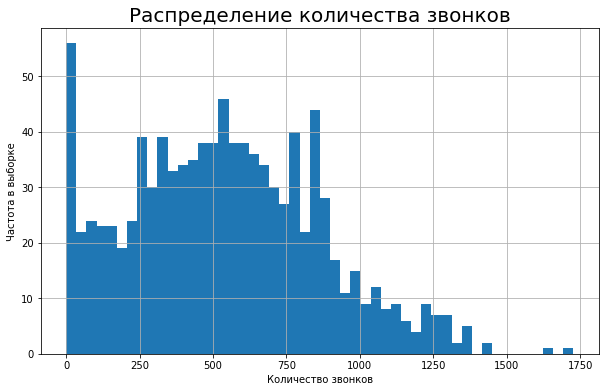

In [48]:
plt.figure(figsize=(10, 6))

ultra_table['calls'].plot(kind='hist', bins=50, grid=True)
plt.title(label='Распределение количества звонков', fontsize=20)
plt.xlabel('Количество звонков')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Мы наблюдаем большой всплеск на отметке 0, так как мы заполнили много пропусков нулями. В основном все данные распределяются в диапозоне меджу 292 и 773 звонками. Данные имеют довольно большой разброс. График в целом похож на график нормального распределения, имеет скошенность влево.

In [49]:
ultra_table['duration'].describe()

count    985.000000
mean      73.392893
std       43.916853
min        0.000000
25%       41.000000
50%       74.000000
75%      104.000000
max      244.000000
Name: duration, dtype: float64

In [50]:
variance = np.var(ultra_table['duration'])
variance

1926.7319291916822

Text(0, 0.5, 'Частота в выборке')

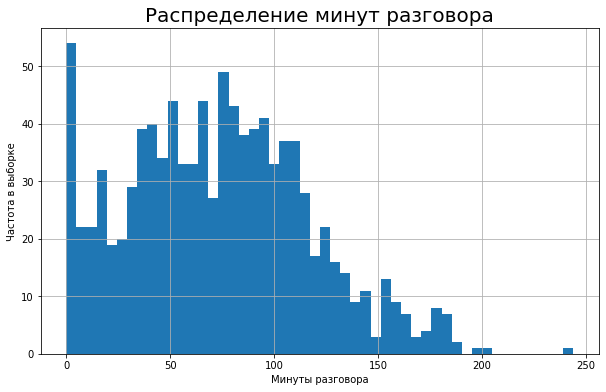

In [51]:
plt.figure(figsize=(10, 6))

ultra_table['duration'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение минут разговора', fontsize=20)
plt.xlabel('Минуты разговора')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Здесь мы также наблюдаем сплеск на 0 из-за того, что заменили пропуски. Небольшой выброс на значении в 250 минут. На этом графике данные в основном распределены в диапозоне от 41 до 104, исходя из значения дисперсии разброс считаю не слишком большим. График также имеет скошенность влево.

In [52]:
ultra_table['mb_used'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

In [53]:
variance = np.var(ultra_table['mb_used'])
variance

101832133.10806875

Text(0, 0.5, 'частота в выборке')

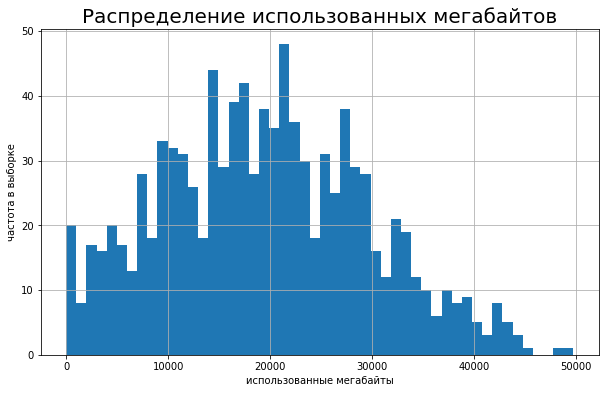

In [54]:
plt.figure(figsize=(10,6))

ultra_table['mb_used'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение использованных мегабайтов', fontsize=20)
plt.xlabel('использованные мегабайты')
plt.ylabel('частота в выборке')

**Комментарий:** 
<br>Наша замена пропусков на 0 здесь уже не так видна, выборка имеет достаточно большой разброс, основная масса значений расположена в диапозоне от 11,5 Гб до 26,2 Гб.

In [55]:
ultra_table['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

In [56]:
variance = np.var(ultra_table['messages'])
variance

2282.9460753948824

Text(0, 0.5, 'Частота в выборке')

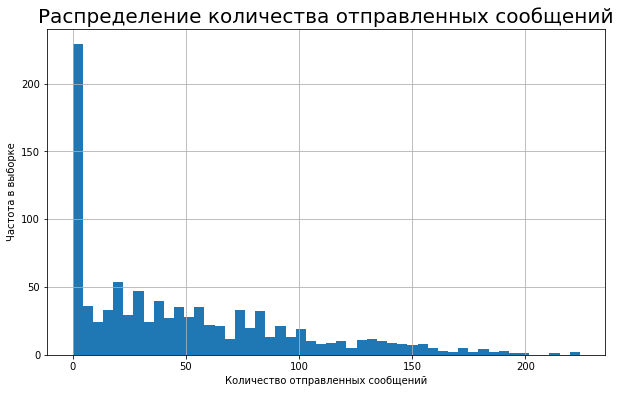

In [57]:
plt.figure(figsize=(10,6))

ultra_table['messages'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение количества отправленных сообщений', fontsize=20)
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Здесь также наблюдаем большой выброс на нуле. Основная масса значений сосредоточена от 6 до 79, разброс выборки достаточно большой, среднее квадратическое отклонение - 47.

**Промежуточный вывод:** 
<br>Сейчас мы рассматривали дорогой тариф, можно сказать, что люди, которые им пользуются в основном не вылезают за рамки лимитов, кроме интернета, тут мы наблюдаем перерасход.

### Пользователи тарифа Smart

In [58]:
smart_table = pivot_data_final.query('tariff_name == "smart"')
smart_table.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,total_revenue
8,1001,smart,2018-11-01,444.0,59.0,18452.0,0.0,1350.0
9,1001,smart,2018-12-01,430.0,63.0,14053.0,0.0,550.0
10,1002,smart,2018-06-01,118.0,15.0,10871.0,4.0,550.0
11,1002,smart,2018-07-01,219.0,26.0,17601.0,11.0,1150.0
12,1002,smart,2018-08-01,294.0,42.0,20347.0,13.0,1550.0


In [59]:
smart_table['calls'].describe()

count    2229.000000
mean      429.450875
std       194.871174
min         0.000000
25%       291.000000
50%       435.000000
75%       560.000000
max      1471.000000
Name: calls, dtype: float64

In [60]:
variance = np.var(smart_table['calls'])
variance

37957.737941136875

Text(0, 0.5, 'Частота в выборке')

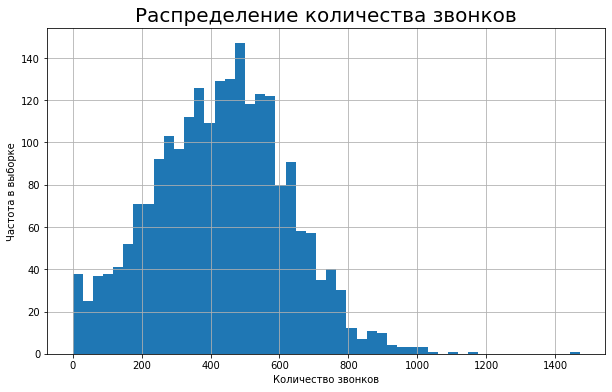

In [61]:
plt.figure(figsize=(10,6))

smart_table['calls'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение количества звонков', fontsize=20)
plt.xlabel('Количество звонков')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Перед нами график нормального распределения с небольшой скошенностью влево, разброс значений, на мой взгляд небольшой. Наблюдаем выбросы в районе от 1200 до 1400 звонков. 

In [62]:
smart_table['duration'].describe()

count    2229.000000
mean       58.463437
std        25.939858
min         0.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: duration, dtype: float64

In [63]:
variance = np.var(smart_table['duration'])
variance

672.5743697067148

Text(0, 0.5, 'частота в выборке')

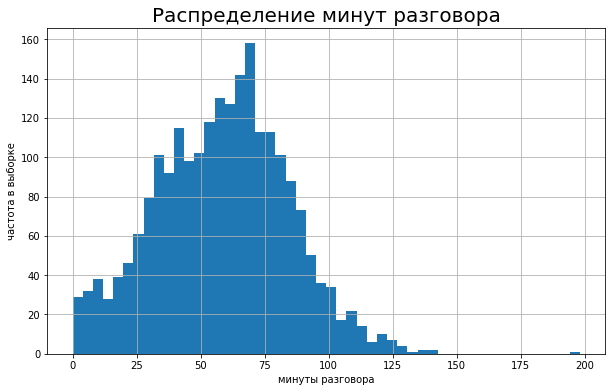

In [64]:
plt.figure(figsize=(10,6))

smart_table['duration'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение минут разговора', fontsize=20)
plt.xlabel('минуты разговора')
plt.ylabel('частота в выборке')

**Комментарий:** 
<br>График нормального распределения с сильной скошенностью влево. Разброс значений минимальный, стандартное отклонение составляет 25%. В основном значения сосредоточены от 40 до 76 минут. Есть небольшой выброс в 198 минут. 

In [65]:
smart_table['mb_used'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

In [66]:
variance = np.var(smart_table['mb_used'])
variance

34530412.73703965

Text(0, 0.5, 'Частота в выборке')

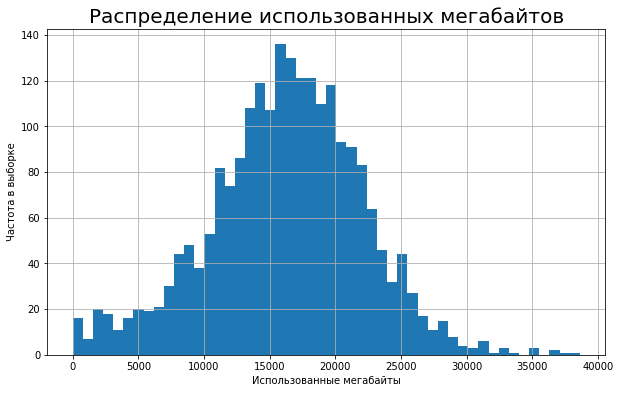

In [67]:
plt.figure(figsize=(10,6))

smart_table['mb_used'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение использованных мегабайтов', fontsize=20)
plt.xlabel('Использованные мегабайты')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Разброс значений достаточно большой, о чем нам говорит значение дисперсии. В основном значения сосредоточены от 12,4 Гб до 19,5 Гб. 

In [68]:
smart_table['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [69]:
variance = np.var(smart_table['messages'])
variance

796.455482917076

Text(0, 0.5, 'Частота в выборке')

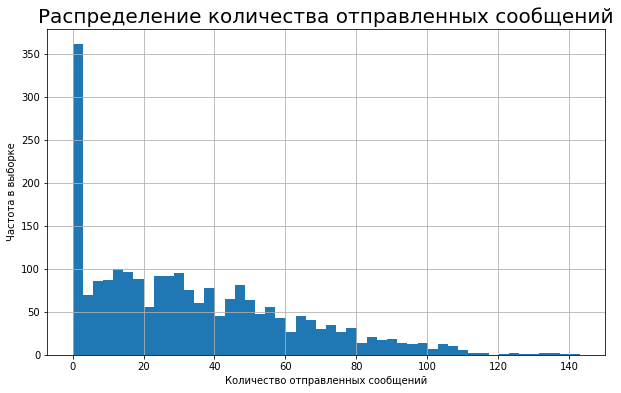

In [70]:
plt.figure(figsize=(10,6))

smart_table['messages'].plot(kind='hist', bins=50, grid=True)

plt.title(label='Распределение количества отправленных сообщений', fontsize=20)
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Частота в выборке')

**Комментарий:** 
<br>Основная масса значений сосредоточена между 10 и 51 сообщениями, разброс, на мой взгляд, большой. Наблюдаем выброс на нуле из-за замены пропусков, хотя предполагаю, что в целом люди не так часто стали пользоваться сообщениями.

**Промежуточный вывод:** 
<br>Рассматриваемый тариф дешевле предыдущего, здесь достаточно много абонентов, которые выходят за рамки установленных лимитов во всех группах (звонки, сообщения, интернет). Больший перерасход, конечно, наблюдается по использованию интернета.

### Сравнение данных по тарифам

Для наглядности построим графики по двум тарифам.

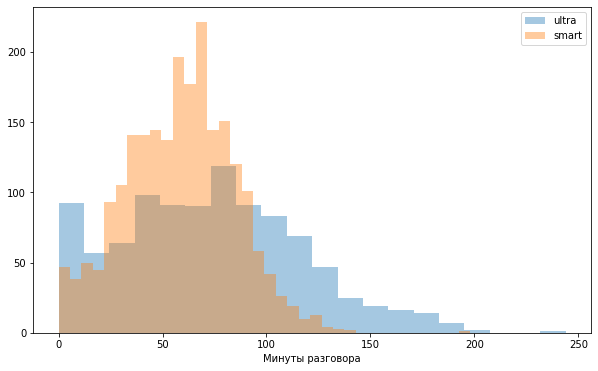

In [71]:
plt.figure(figsize=(10,6))
for tariff_name in ['ultra', 'smart']:  
    sns.distplot(pivot_data_final.query('tariff_name == @tariff_name')['duration'], kde=False, label=tariff_name)
    plt.legend(['ultra', 'smart'])
    plt.xlabel('Mинуты разговора')

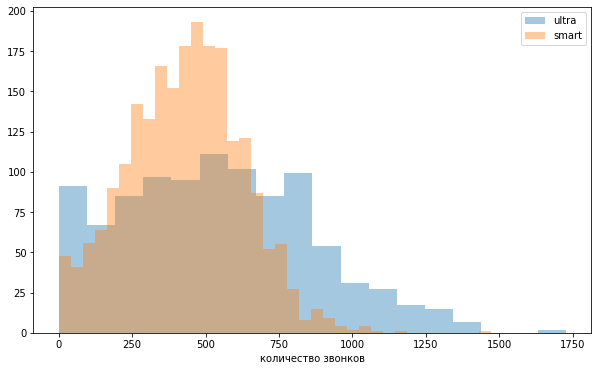

In [72]:
plt.figure(figsize=(10,6))
for tariff_name in ['ultra', 'smart']:
    sns.distplot(pivot_data_final.query('tariff_name == @tariff_name')['calls'], kde=False, label=tariff_name)
    plt.legend(['ultra', 'smart'])
    plt.xlabel('количество звонков')

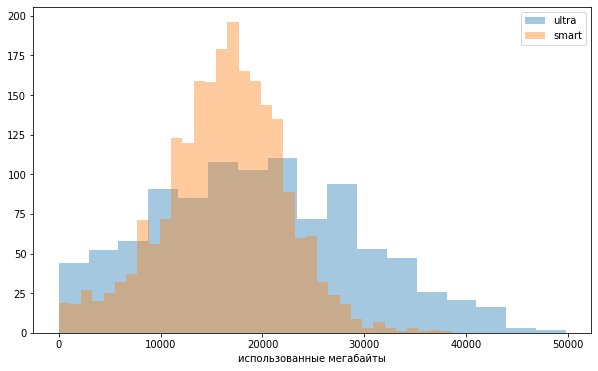

In [73]:
plt.figure(figsize=(10,6))
for tariff_name in ['ultra', 'smart']:
    sns.distplot(pivot_data_final.query('tariff_name == @tariff_name')['mb_used'], kde=False, label=tariff_name)
    plt.legend(['ultra', 'smart'])
    plt.xlabel('использованные мегабайты')

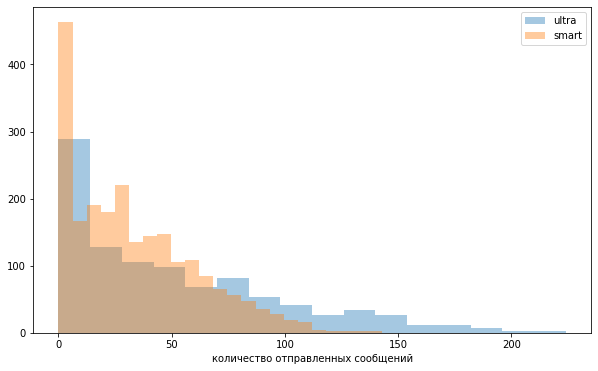

In [74]:
plt.figure(figsize=(10,6))
for tariff_name in ['ultra', 'smart']:
    sns.distplot(pivot_data_final.query('tariff_name == @tariff_name')['messages'], kde=False, label=tariff_name)
    plt.legend(['ultra', 'smart'])
    plt.xlabel('количество отправленных сообщений')

**Общий вывод** 

- Если говорить о разбросах значений, то разброс в тарифе Ультра значительно больше по всем категориям. Думаю, это связано с тем, что сам пакет дороже и включает в себя больше возможностей.
- Медианные значения у двух выборок примерно одинаковые, как и концентрация большей части значений, что, думаю, говорит нам о том, что привычки у людей в целом примерно одинаковые. 
- Самая большая разница по использованию тарифов видна в пользовании интернетом, у абонентов тарифа Ультра диапозон распределения большей части значения гораздо шире.
- Пользователей тарифа Смарт гораздо больше (почти в 2 раза), но и переплат у них также больше.

## Гипотеза № 1

**Условие:**\
 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Я бы сформулировала гипотезы следующим способом:

**$Н_0$:** - Средняя выручка пользоваталей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт"

**$Н_1$:** - Средняя выручка пользоваталей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт"

Уровень значимости я хочу назначить 0,01 - так как у нас достаточно большая выборка, поэтому 5% кажется достаточно большой вероятностью ошибки. Будем делать двусторонний тест.

In [75]:
#подготовим выборки

ultra_filter = pivot_data_final.query('tariff_name == "ultra"')['total_revenue']
smart_filter = pivot_data_final.query('tariff_name == "smart"')['total_revenue']

In [76]:
#сделаем предварительное сравнение дисперсий

variance1 = np.var(ultra_filter)
print('Дисперсия выборки ultra_filter:', variance1)

variance2 = np.var(smart_filter)
print('Дисперсия выборки smart_filter:', variance2)

Дисперсия выборки ultra_filter: 143345.5641732588
Дисперсия выборки smart_filter: 552423.5036551708


In [77]:
#так как дисперсии наших выборок довольно сильно отличаются, для параментра equal_var мы выбираем False

alpha = 0.01

results = st.ttest_ind(
            ultra_filter,
            smart_filter,
            equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


In [78]:
#посмотрим на средние значения выборок

pivot_data_final.pivot_table(index='tariff_name', values='total_revenue', aggfunc='median')

,total_revenue
tariff_name,
smart,950.0
ultra,1950.0


**Комментарий:** 
<br>Мы уже сравнивали распределение данных в предыдущем пункте, из которого было видно, что выборки очень разные. Двусторонний тест отвергнул нулевую теорию. Среднее по тарифу "Смарт" превышает его стоимость (550р), отсюда можно сделать вывод, что абонент с таким тарифом в конце месяца будет все равно платить больше стоимости тарифа.

## Гипотеза № 2

**Условие:**\
 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Я бы сформулировала гипотезы следующим способом:

**$H_0$:** - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

**$Н_1$:** - Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов

Уровень значимости я хочу назначить 0,01 - так как у нас достаточно большая выборка, поэтому 5% кажется достаточно большой вероятностью ошибки. Будем делать двусторонний тест.

In [79]:
#добавим столбец с значением города

pivot_data_final['city'] = data_users['city']
pivot_data_final.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,total_revenue,city
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1950.0,Краснодар
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1950.0,Москва
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1950.0,Стерлитамак
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1950.0,Москва
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1950.0,Новокузнецк


In [80]:
#подготовим выборки

ultra_filter_city = pivot_data_final.query('city == "Москва"')['total_revenue']
smart_filter_city = pivot_data_final.query('city != "Москва"')['total_revenue']

In [81]:
#сделаем предварительное сравнение дисперсий

variance1 = np.var(ultra_filter_city)
print('Дисперсия выборки ultra_filter_city:', variance1)

variance2 = np.var(smart_filter_city)
print('Дисперсия выборки smart_filter_city:', variance2)

Дисперсия выборки ultra_filter_city: 650217.572288542
Дисперсия выборки smart_filter_city: 597827.9073075189


In [82]:
#так как дисперсии наших выборок довольно сильно отличаются, для параментра equal_var мы выбираем False

alpha = 0.05

results = st.ttest_ind(
            ultra_filter_city,
            smart_filter_city,
            equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.27055026896551415
Не получилось отвергнуть нулевую гипотезу


In [83]:
#для удобства визуализации средних значений сделаем категоризацию

def region(city):
    if city == 'Москва':
        return 'Москва'
    return 'Другой'

pivot_data_final['region'] = pivot_data_final['city'].apply(region)
pivot_data_final.head(5)

,user_id,tariff_name,month,calls,duration,mb_used,messages,total_revenue,city,region
0,1000,ultra,2018-05-01,164.0,22.0,2256.0,22.0,1950.0,Краснодар,Другой
1,1000,ultra,2018-06-01,187.0,43.0,23257.0,60.0,1950.0,Москва,Москва
2,1000,ultra,2018-07-01,346.0,47.0,14016.0,75.0,1950.0,Стерлитамак,Другой
3,1000,ultra,2018-08-01,418.0,52.0,14070.0,81.0,1950.0,Москва,Москва
4,1000,ultra,2018-09-01,478.0,58.0,14581.0,57.0,1950.0,Новокузнецк,Другой


In [84]:
pivot_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        3214 non-null   int64         
 1   tariff_name    3214 non-null   object        
 2   month          3214 non-null   datetime64[ns]
 3   calls          3214 non-null   float64       
 4   duration       3214 non-null   float64       
 5   mb_used        3214 non-null   float64       
 6   messages       3214 non-null   float64       
 7   total_revenue  3214 non-null   float64       
 8   city           500 non-null    object        
 9   region         3214 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 251.2+ KB


In [85]:
#посмотрим на средние значения выборок

pivot_data_final.pivot_table(index='region', values='total_revenue', aggfunc='median')

,total_revenue
region,
Другой,1550.0
Москва,1350.0


In [86]:
pivot_data_final['region'].value_counts()

Другой    3115
Москва      99
Name: region, dtype: int64

In [87]:
pivot_data_final.pivot_table(index=['region', 'tariff_name'], values='user_id', aggfunc='count')

user_id
region tariff_name         
Другой smart           2147
       ultra            968
Москва smart             82
       ultra             17

**Комментарий:** 
<br>У нас нет достаточных оснований, чтобы опровергнуть нудевую гипотезу, хотя мы и видим, что среднее значение по Москве немного меньше, чем по остальным регионам. Вероятно небольшая разница между Москвой и регионами обусловлена тем, что в Москве люди привыкли много звонить и пользоваться интернетом, поэтому даже если они используют тариф "Смарт", то вероятнее всего переплачивают за него. 

## Общий вывод

Можно сделать следующие выводы:

- Пользователей тарифа "Смарт" больше, чем пользователей "Ультра"
- Разброс данных по тарифу "Ультра" больше, думаю, что это связано с более широкими тарифными условиями. Пользователи могут более свободно пользоваться интернетом, дольше разговаривать по телефону и больше отправлять сообщений. 
- Абоненты, которые подключили тариф "Смарт" в конце месяца переплачивают гораздо чаще, чем пользователи тарифа "Ультра". Это связано, конечно, с ограниченными тарифными лимитами - слишком мало минут, мегабайтов и смс.
- Средняя выручка по тарифу "Ультра" выше, чем по тарифу "Смарт", но и разница в стоимости у них большая. 
- В Москве не так много абонентов "Мегалайна", из них большая часть пользуется "Смартом".
- Не смотря на то, что в Москве не очень много абонентов, средняя выручка от других регионов практически не отличается. 
- В среднем пользователи тарифа "Смарт" переплачивают около 400р. ежемесячно.